### Name : Talole Prajakta Vijay 

**Project Name :Titanic Dataset Analysis :** 
In this Project we want you to use the Titanic passenger data (name, age, price of ticket, etc.) for predicting who will survive and who will die.
The requirement is to predict passengers’ survive. Prediction is to build a model which takes input data and produce an output. A prediction model is a mathematical formula that takes input from historical facts reflecting past event and produce a output that to make predictions about future or otherwise unknown events. 

Steps :
Information Fetching, EDA ,Model Building ,Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file to Pandas DataFrame
train_data = pd.read_csv('train.csv')

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#data.describe()
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for duplicate values
train_data.duplicated().sum()

0

In [8]:
## Checking for the null Values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# % of Null
(train_data.isnull().sum()/(len(train_data)))*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

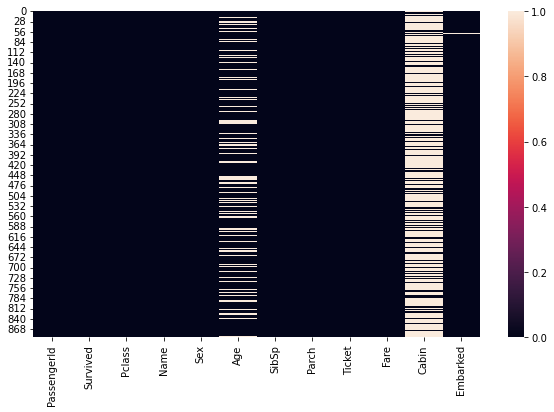

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(train_data.isnull())


In [11]:
#### Here we can see there are null values in column : Age,Cabin ,Embarked

In [12]:
# drop the "Cabin" column from the dataframe as it is of nu use
train_data = train_data.drop(columns='Cabin', axis=1)

In [13]:
# replacing the missing values in "Age" column with mean value
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [14]:
# finding the mode value of "Embarked" column
print(train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
# replacing the missing values in "Embarked" column with mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [18]:
for column in train_data.columns:
    if train_data[column].dtype == object:
        print(str(column) + ' : ' + str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print("_________________________________________________________________")

Name : ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 

In [19]:
## Unique values in each column
for col in train_data.columns:
    print(col,train_data[col].nunique())
    print('-'*35)

PassengerId 891
-----------------------------------
Survived 2
-----------------------------------
Pclass 3
-----------------------------------
Name 891
-----------------------------------
Sex 2
-----------------------------------
Age 89
-----------------------------------
SibSp 7
-----------------------------------
Parch 7
-----------------------------------
Ticket 681
-----------------------------------
Fare 248
-----------------------------------
Embarked 3
-----------------------------------


<AxesSubplot:>

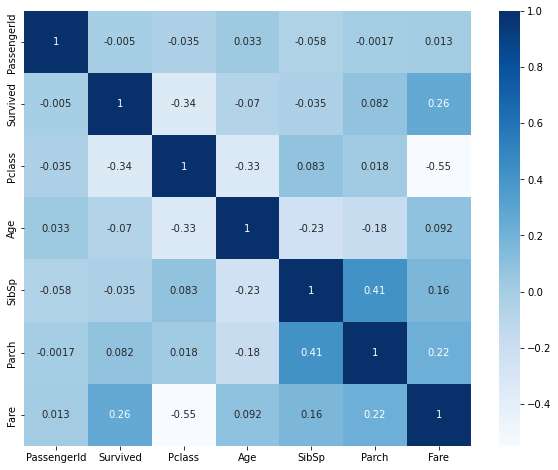

In [20]:
## Checking for correlation
fig=plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),cbar=True,annot=True,cmap='Blues')

In [21]:
## No any dependent variable is correlated to other dependent variable (no any corlation coefficient is greater 
##than or equal to 0.8)


## Exploratory Data Analysis

In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64
2


Text(0.5, 1.0, 'Percentage of Survived Peoples')

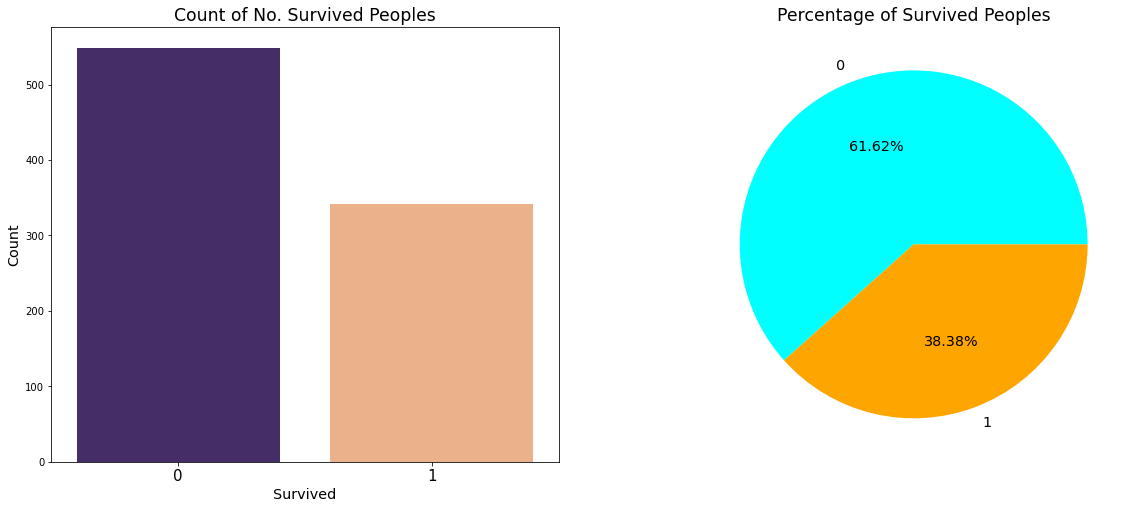

In [23]:
#Target Variable : survived
print(train_data['Survived'].value_counts())
print(train_data['Survived'].nunique())
plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x=train_data['Survived'],palette=['#432371',"#FAAE7B"])
plt.title('Count of No. Survived Peoples',fontdict={'fontsize':'xx-large'})
plt.xlabel('Survived',fontdict={'fontsize':'x-large'})
plt.xticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.pie(train_data['Survived'].value_counts(),labels=train_data['Survived'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'],textprops={'fontsize':'x-large'})
plt.title('Percentage of Survived Peoples',fontdict={'fontsize':'xx-large'})

### Count of peoples not-survived is higher than people who survived

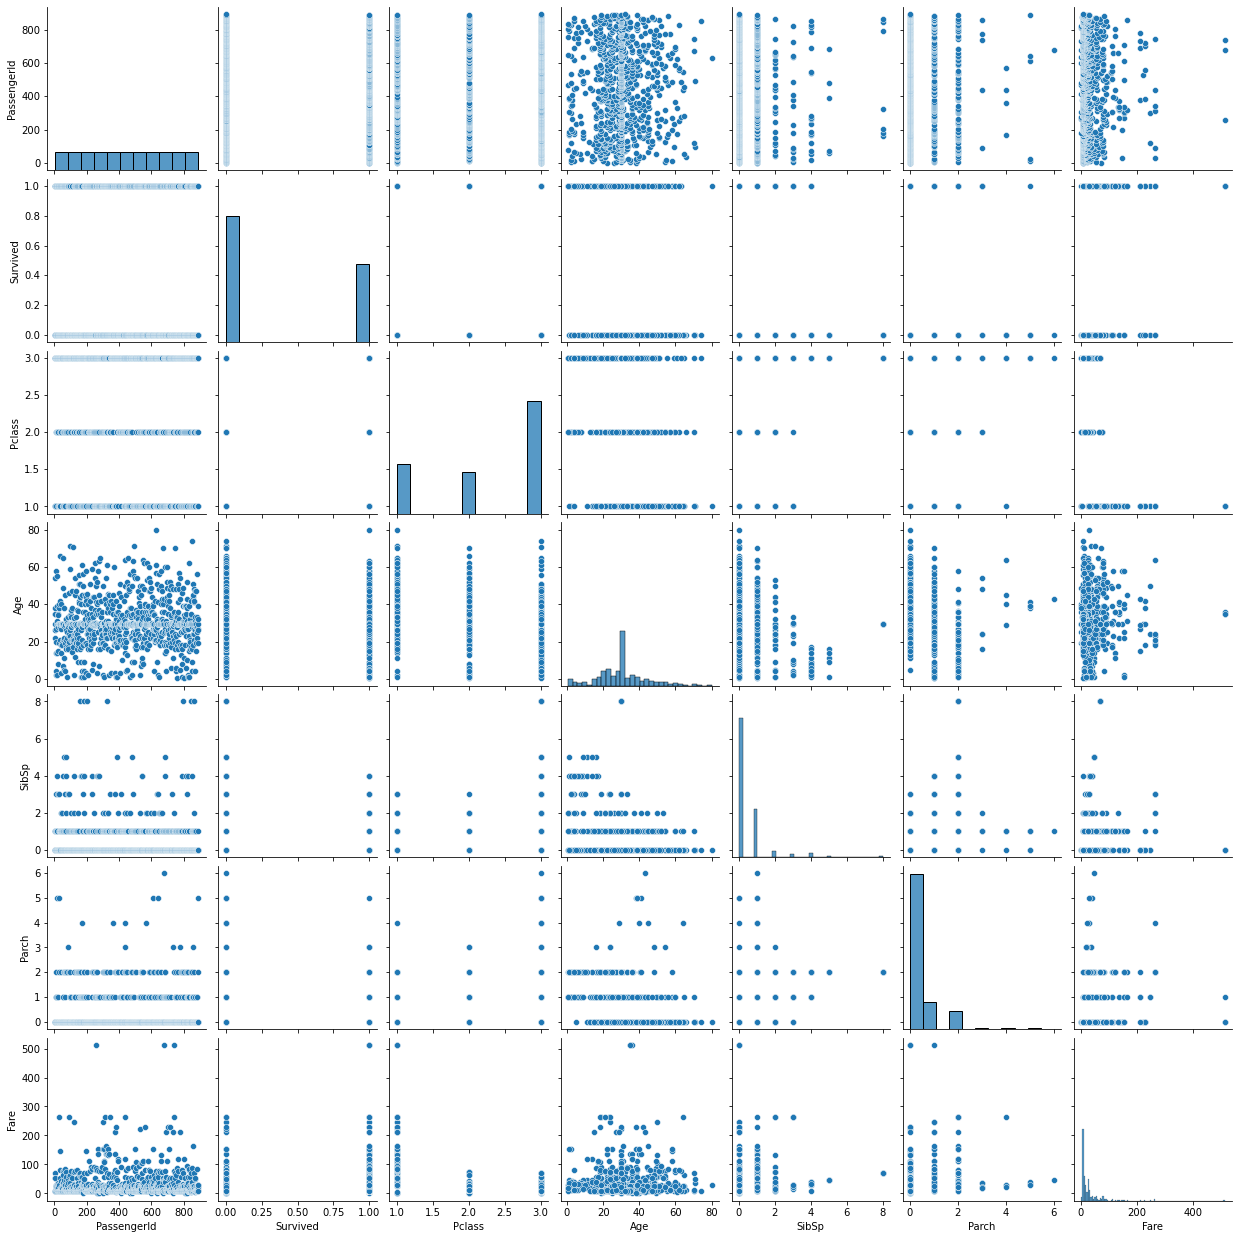

In [24]:
sns.pairplot(data=train_data,dropna=True)

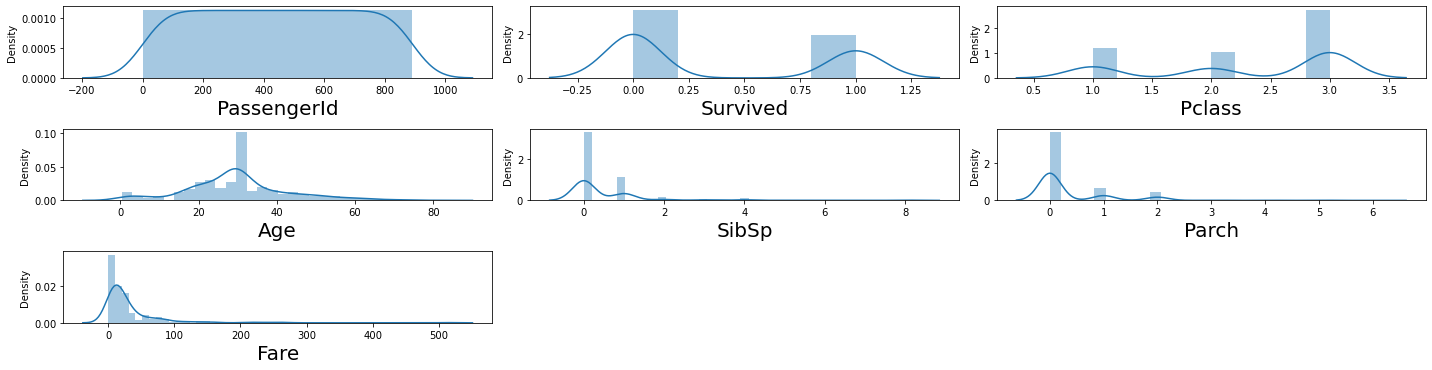

In [25]:
#lets check distribution for continuous columns
num_train_data = train_data._get_numeric_data()
plt.figure(figsize = (20,20))

plotnumber = 1
for column in num_train_data:
    if plotnumber <=30:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(num_train_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

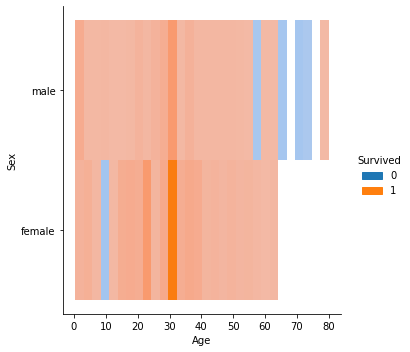

In [26]:
sns.displot(data=train_data,x='Age',y='Sex',hue='Survived')

In [27]:
#####P-class####
print(train_data['Pclass'].value_counts())
print(train_data['Pclass'].nunique())


3    491
1    216
2    184
Name: Pclass, dtype: int64
3


Text(0.5, 1.0, 'Survived')

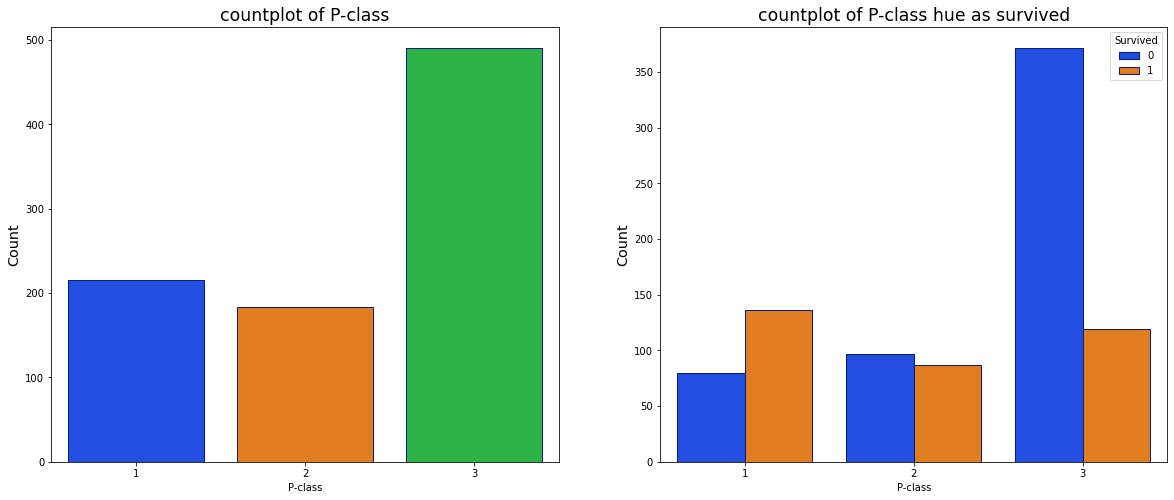

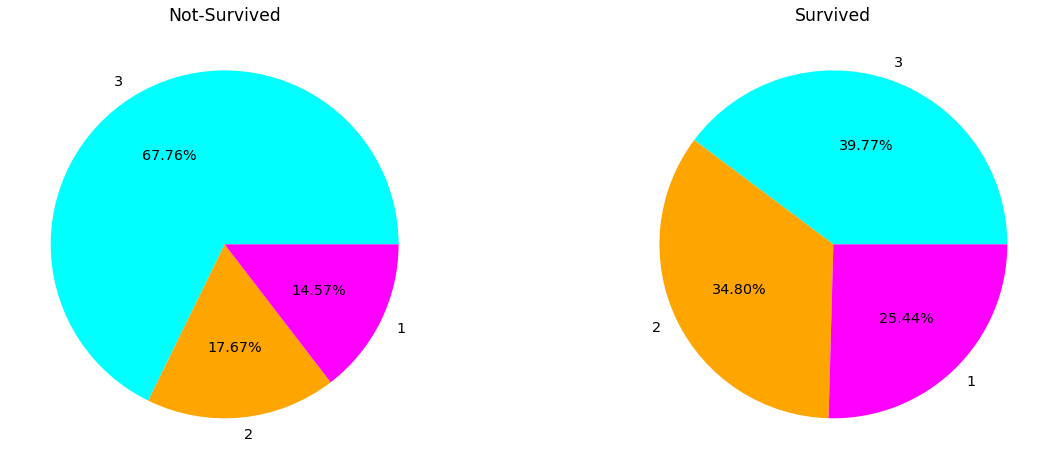

In [28]:

plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)

sns.countplot(x=train_data['Pclass'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of P-class',fontdict={'fontsize':'xx-large'})
plt.xlabel('P-class')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=train_data['Pclass'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=train_data['Survived'])
plt.title('countplot of P-class hue as survived',fontdict={'fontsize':'xx-large'})
plt.xlabel('P-class')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplots(1,2,figsize=(20,8))


plt.subplot(1,2,1)
Survived_0=train_data[train_data['Survived']==0]
plt.pie(Survived_0['Pclass'].value_counts(),labels=[3,2,1],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Not-Survived',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Survived_1=train_data[train_data['Survived']==1]
plt.pie(Survived_1['Pclass'].value_counts(),labels=[3,2,1],autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Survived',fontdict={'fontsize':'xx-large'})

#### Observation:Most of the peoples are from pclass 3 and for the p-class 3 most of the people does not  survived
Passenegers Of Pclass 1 has a very high priority to survive.
The number of Passengers in Pclass 3 were a lot higher than Pclass 1 and Pclass 2, but still the number of survival from Pclass 3 is low compare to them


<AxesSubplot:xlabel='Sex', ylabel='count'>

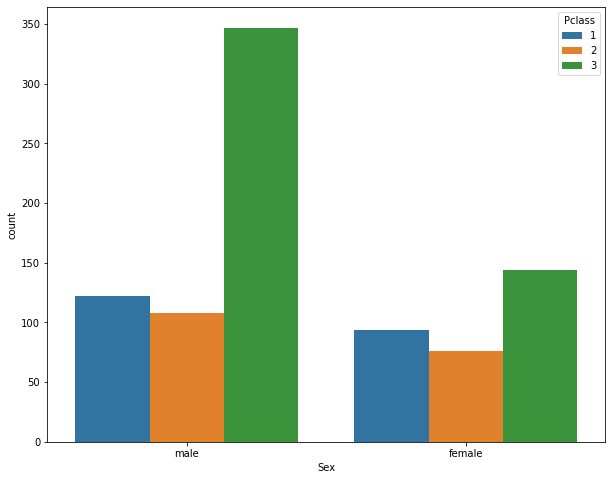

In [29]:
###### Sex#####

plt.figure(figsize=(10,8))
sns.countplot(train_data['Sex'],hue=train_data['Pclass'])

male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Survived')

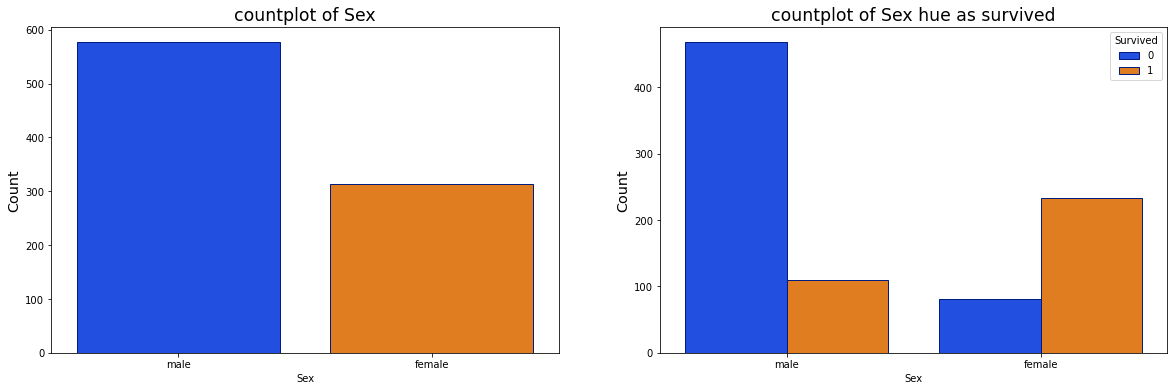

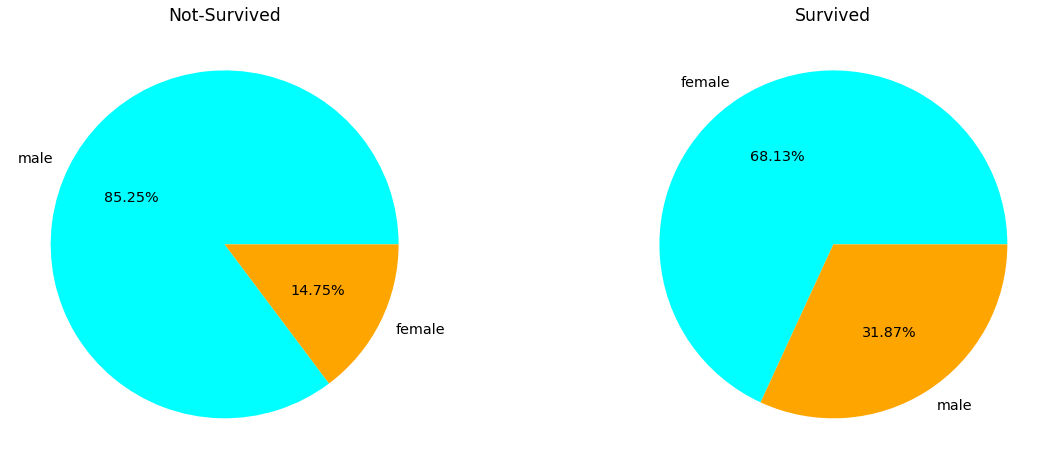

In [30]:
#### Sex #####

print(train_data['Sex'].value_counts())

plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)

sns.countplot(x=train_data['Sex'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of Sex',fontdict={'fontsize':'xx-large'})
plt.xlabel('Sex')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=train_data['Sex'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=train_data['Survived'])
plt.title('countplot of Sex hue as survived',fontdict={'fontsize':'xx-large'})
plt.xlabel('Sex')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplots(1,2,figsize=(20,8))


plt.subplot(1,2,1)
Survived_0=train_data[train_data['Survived']==0]
plt.pie(Survived_0['Sex'].value_counts(),labels=Survived_0['Sex'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Not-Survived',fontdict={'fontsize':'xx-large'})

plt.subplot(1,2,2)
Survived_1=train_data[train_data['Survived']==1]
plt.pie(Survived_1['Sex'].value_counts(),labels=Survived_1['Sex'].value_counts().index,autopct='%0.2f%%',textprops={'fontsize':'x-large'},colors=['cyan','orange','magenta'])
plt.title('Survived',fontdict={'fontsize':'xx-large'})

#### Observation:
The number of men on board the ship is much higher than the number of women, but the number of women saved is more than twice that of the number of males survived.


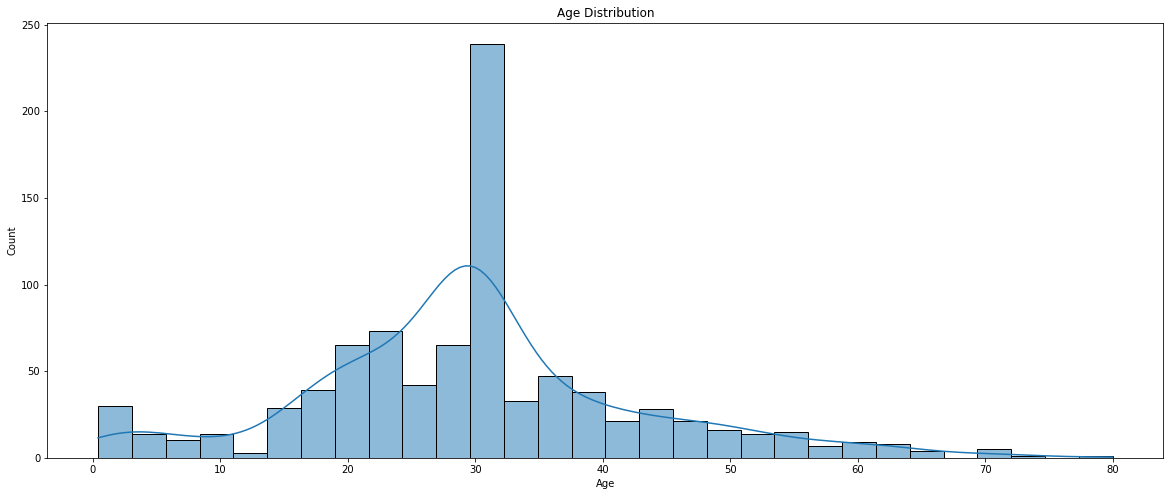

<Figure size 1440x576 with 0 Axes>

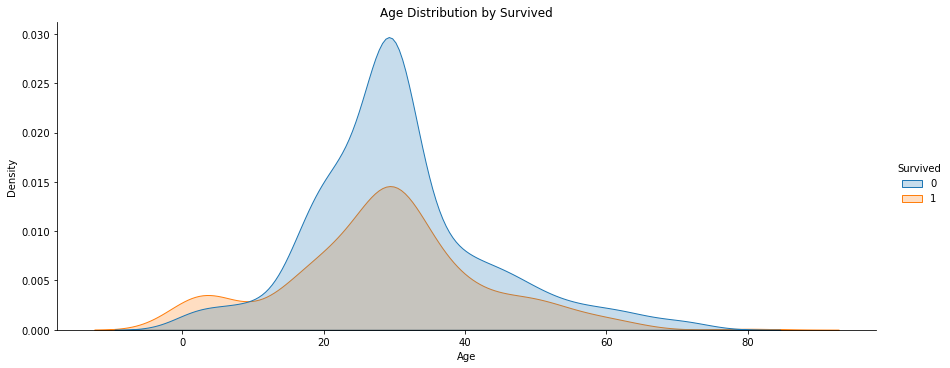

In [31]:
### Age
plt.figure(figsize=(20,8))
sns.histplot(train_data["Age"],kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(20,8))
sns.displot(x=train_data['Age'], hue=train_data['Survived'], kind='kde', fill=True,aspect=2.5 )
plt.title('Age Distribution by Survived')
plt.show()


### Observation :
Peoples in the age-range 30 to 40 has high chances of survived

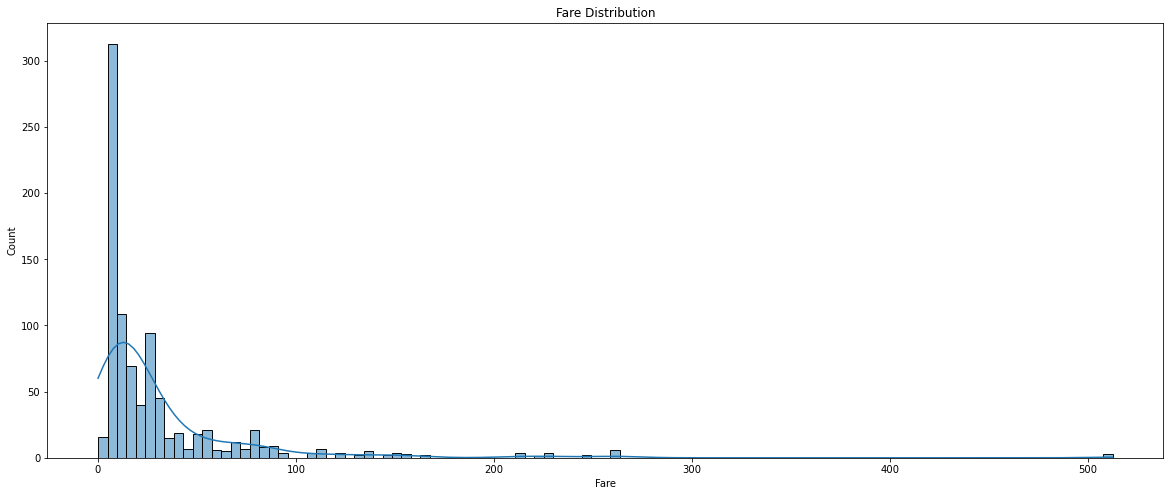

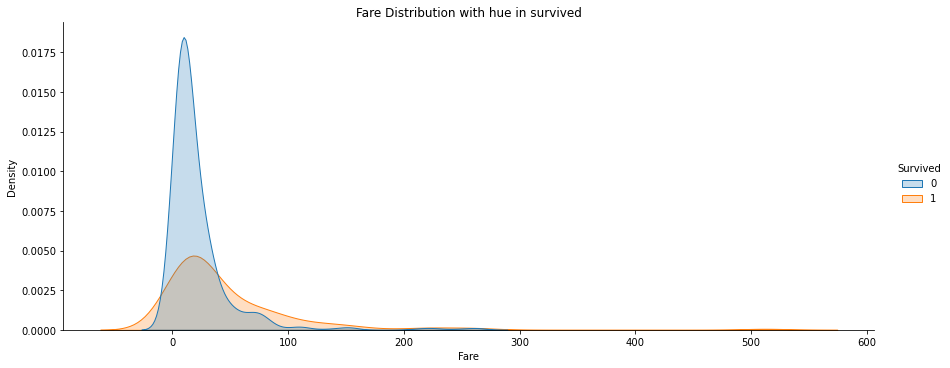

In [32]:
#### Fare ####

plt.figure(figsize=(20,8))
sns.histplot(train_data["Fare"],kde=True)
plt.title('Fare Distribution')

sns.displot(x=train_data['Fare'], hue=train_data['Survived'], kind='kde', fill=True,aspect=2.5)
plt.title('Fare Distribution with hue in survived')
plt.show()

Text(0, 0.5, 'Count')

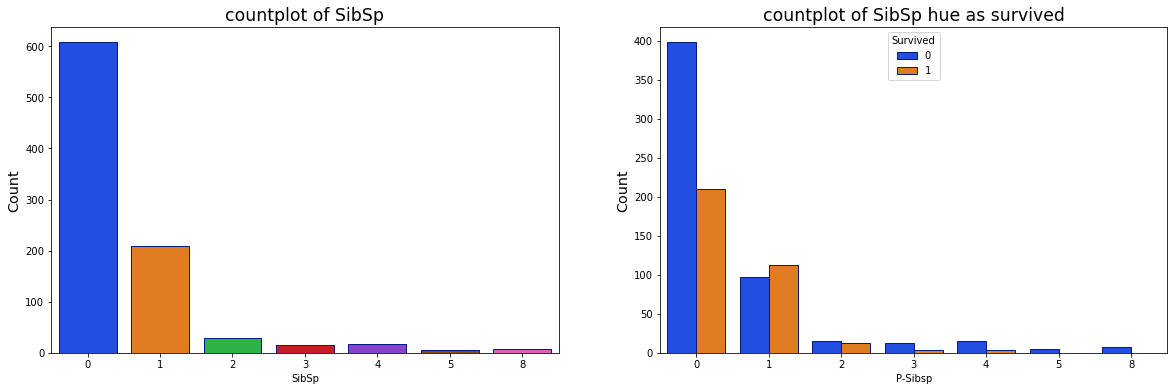

In [33]:

### SibSP

plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)

sns.countplot(x=train_data['SibSp'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of SibSp',fontdict={'fontsize':'xx-large'})
plt.xlabel('SibSp')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=train_data['SibSp'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=train_data['Survived'])
plt.title('countplot of SibSp hue as survived',fontdict={'fontsize':'xx-large'})
plt.xlabel('P-Sibsp')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})



0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Text(0, 0.5, 'Count')

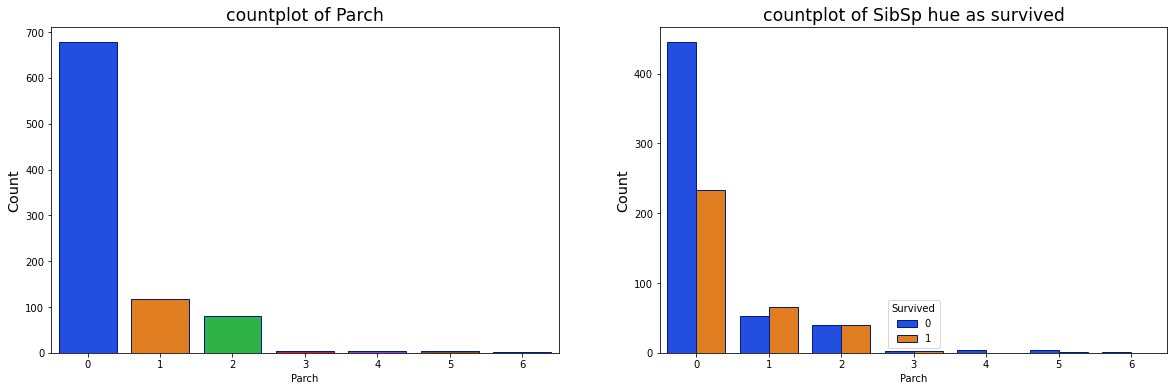

In [34]:
### Parch ###
print(train_data['Parch'].value_counts())
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)

sns.countplot(x=train_data['Parch'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of Parch',fontdict={'fontsize':'xx-large'})
plt.xlabel('Parch')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=train_data['Parch'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=train_data['Survived'])
plt.title('countplot of SibSp hue as survived',fontdict={'fontsize':'xx-large'})
plt.xlabel('Parch')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})


Text(0, 0.5, 'Count')

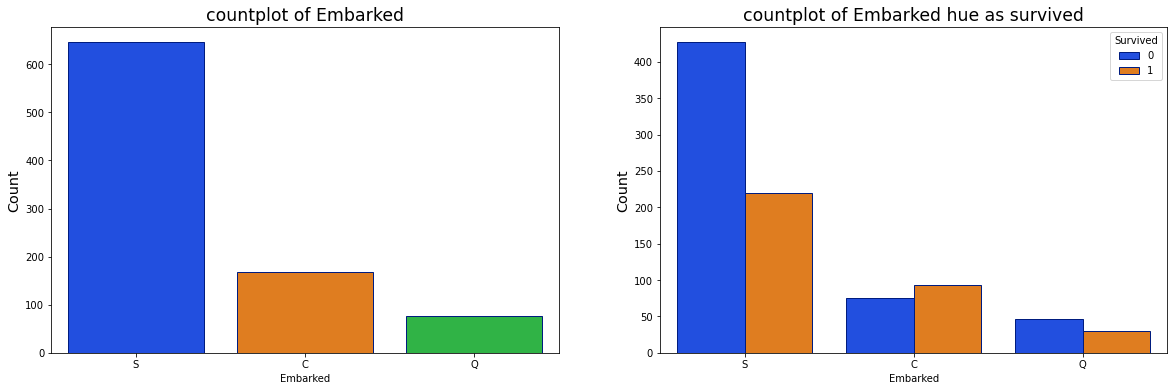

In [35]:
### Embarked ###
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)

sns.countplot(x=train_data['Embarked'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1))
plt.title('countplot of Embarked',fontdict={'fontsize':'xx-large'})
plt.xlabel('Embarked')
plt.ylabel('Count',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)

sns.countplot(x=train_data['Embarked'],  data = train_data, palette="bright",
              edgecolor=sns.color_palette("dark", n_colors = 1),hue=train_data['Survived'])
plt.title('countplot of Embarked hue as survived',fontdict={'fontsize':'xx-large'})
plt.xlabel('Embarked')

plt.ylabel('Count',fontdict={'fontsize':'x-large'})

#### Observation :
peoples with embarkation at S=southmpton are more in ship as compare to C=Cherbourg and  Q=QueenStown

### Feature Engineering

#### Dropping Un-necessary columns

In [36]:
#Drop the un-necessary column  :
train_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1,inplace=True) 

In [37]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Label Encoding

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,auc
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import classification_report ,confusion_matrix


In [39]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [40]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["Pclass"] = le.fit_transform(res_df["Pclass"])
    res_df["Sex"] = le.fit_transform(res_df["Sex"])
    res_df["Age"] = le.fit_transform(res_df["Age"])
    res_df["Embarked"] = le.fit_transform(res_df["Embarked"])
    
    
    res_df["Survived"] = le.fit_transform(res_df["Survived"])
    return res_df

In [41]:
df=preprocessor(train_data)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,7.2500,2
1,1,0,0,52,1,0,71.2833,0
2,1,2,0,34,0,0,7.9250,2
3,1,0,0,48,1,0,53.1000,2
4,0,2,1,48,0,0,8.0500,2


In [43]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
## Extracting Terget Variable
X=df.drop('Survived',axis=1)
y=df.loc[:,['Survived']]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
type(X_test)

pandas.core.frame.DataFrame

#### Scaling 

In [47]:
## scaling is done to convert the data into standard form 
standard_scaler=StandardScaler()     ## instanciation  
X_train=standard_scaler.fit_transform(X_train)  ## fit and transfrom both on training set
X_test=standard_scaler.transform(X_test)    ## only transform on testing set once we have fitted on training set

In [48]:
#model with Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [71]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
Y_predlr = LR.predict(X_test)

accuracy_lr = accuracy_score(y_test,Y_predlr)*100
print(f"Accuracy Score:", accuracy_lr)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_predlr)}")

#Precision and recall
print(f"Precision : \n {precision_score(y_test,Y_predlr)}\n")
print(f"Recall : \n {recall_score(y_test,Y_predlr)}")

#cross validation score
scores = cross_val_score(LR, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_lr - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 78.77094972067039
roc_auc_score: 77.27848101265822
---------------------------------------------------
Confusion Matrix : 
 [[90 10]
 [28 51]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.84      0.65      0.73        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179

Precision : 
 0.8360655737704918

Recall : 
 0.6455696202531646

Cross validation score : 80.61459667093469

Accuracy Score - Cross Validation Score : -1.8436469502643007


In [49]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,Y_pred_dt)*100

print(f"Accuracy Score:", accuracy_dt)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_dt)}")


#Precision and recall
print(f"Precision : \n {precision_score(y_test,Y_pred_dt)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_dt)}")
#cross validation score
scores = cross_val_score(dt, X_train, y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_dt - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.09497206703911
roc_auc_score: 76.5759493670886
---------------------------------------------------
Confusion Matrix : 
 [[81 19]
 [22 57]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.75      0.72      0.74        79

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179

Precision : 
 0.75

Recall : 
 0.7215189873417721

Cross validation score : 78.92642568698906


Accuracy Score - Cross Validation Score : -1.8314536199499543


In [50]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
Y_pred_rf = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test,Y_pred_rf)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(y_test,Y_pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_rf)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_rf)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_rf)}")

#cross validation score
scores = cross_val_score(RF, X_train, y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 80.44692737430168

roc_auc_score: 79.70886075949366
---------------------------------------------------
Confusion Matrix : 
 [[86 14]
 [21 58]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.81      0.73      0.77        79

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Precision : 
 0.8055555555555556

Recall : 
 0.7341772151898734

Cross validation score : 81.17403723037526


Accuracy Score - Cross Validation Score : -0.7271098560735823


In [52]:
#lets selects different parameters for tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[100,200,300,400],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [53]:
import time
cv_rf = RandomizedSearchCV(RF, cv = 10,
                     param_distributions=grid_params, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [54]:
RF.set_params(n_estimators=400,
                  bootstrap = True,
                max_features='log2',
                  criterion= 'entropy',
                 min_samples_split= 2,
                 max_depth= 10)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=400)

In [55]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=400)

In [56]:

Y_pred_Hyper=RF.predict(X_test)
accuracy_RF_hyper = accuracy_score(y_test,Y_pred_Hyper)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(y_test,Y_pred_Hyper)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_Hyper)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_Hyper)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_Hyper)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_Hyper)}")

#cross validation score
scores = cross_val_score(RF, X_train, y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF_hyper - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 80.44692737430168

roc_auc_score: 81.0759493670886
---------------------------------------------------
Confusion Matrix : 
 [[90 10]
 [22 57]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.85      0.72      0.78        79

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Precision : 
 0.8507462686567164

Recall : 
 0.7215189873417721

Cross validation score : 83.41967891263664


Accuracy Score - Cross Validation Score : -1.2967738847036827


In [57]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)
kn.fit(X_train,y_train)
Y_pred_kn = kn.predict(X_test)
accuracy_kn = accuracy_score(y_test,Y_pred_kn)*100

print(f"Accuracy Score:", accuracy_kn)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_kn)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_kn)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_kn)}")

#cross validation score
scores = cross_val_score(kn,X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_kn - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.6536312849162
roc_auc_score: 75.87974683544304
---------------------------------------------------
Confusion Matrix : 
 [[91  9]
 [31 48]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.61      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179

Precision : 
 0.8421052631578947

Recall : 
 0.6075949367088608

Cross validation score : 82.15010341770905


Accuracy Score - Cross Validation Score : -4.496472132792846


In [58]:
knn_model_1 = KNeighborsClassifier()

param_grid ={"n_neighbors":np.arange(3,50),
          "p":[1,2]}

rscv_knn_model=RandomizedSearchCV(knn_model_1, param_grid, cv=5)
rscv_knn_model.fit(X_train,y_train)
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=12, p=1)

In [59]:
new_knn_model = rscv_knn_model.best_estimator_
new_knn_model.fit(X_train,y_train)

Y_pred_new=new_knn_model.predict(X_test)

accuracy_kn_new = accuracy_score(y_test,Y_pred_new)*100

print(f"Accuracy Score:", accuracy_kn)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_new)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_new)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_new)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_new)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_new)}")

#cross validation score
scores = cross_val_score(kn,X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_kn_new - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.6536312849162
roc_auc_score: 73.71518987341771
---------------------------------------------------
Confusion Matrix : 
 [[93  7]
 [36 43]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       100
           1       0.86      0.54      0.67        79

    accuracy                           0.76       179
   macro avg       0.79      0.74      0.74       179
weighted avg       0.78      0.76      0.75       179

Precision : 
 0.86

Recall : 
 0.5443037974683544

Cross validation score : 82.15010341770905


Accuracy Score - Cross Validation Score : -6.1724497864241386


In [60]:
#### Gradient Boosting classifier ,Adaboost classifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,
    learning_rate=0.01,
    algorithm='SAMME')
ada_model=ada.fit(X_train,y_train)
Y_pred_ad=ada_model.predict(X_test)

accuracy_ad = accuracy_score(y_test,Y_pred_ad)*100

print(f"Accuracy Score:", accuracy_ad)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_ad)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_ad)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_ad)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_ad)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_ad)}")

#cross validation score
scores = cross_val_score(kn, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_ad - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 76.53631284916202
roc_auc_score: 75.0126582278481
---------------------------------------------------
Confusion Matrix : 
 [[88 12]
 [30 49]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.80      0.62      0.70        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179

Precision : 
 0.8032786885245902

Recall : 
 0.620253164556962

Cross validation score : 82.15010341770905


Accuracy Score - Cross Validation Score : -5.6137905685470315


In [61]:
#Gradient boost 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=5)
gb_model=gb.fit(X_train,y_train)
Y_pred_gb=gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test,Y_pred_gb)*100

print(f"Accuracy Score:", accuracy_gb)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_gb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_gb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_gb)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_gb)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_gb)}")

#cross validation score
scores = cross_val_score(gb,X_train,y_train ,cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_gb - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 75.97765363128491
roc_auc_score: 72.91772151898734
---------------------------------------------------
Confusion Matrix : 
 [[99  1]
 [42 37]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.70      0.99      0.82       100
           1       0.97      0.47      0.63        79

    accuracy                           0.76       179
   macro avg       0.84      0.73      0.73       179
weighted avg       0.82      0.76      0.74       179

Precision : 
 0.9736842105263158

Recall : 
 0.46835443037974683

Cross validation score : 81.0381168127647


Accuracy Score - Cross Validation Score : -5.06046318147979


In [62]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train,y_train)
Y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,Y_pred_xgb)*100

print(f"Accuracy Score:", accuracy_xgb)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_xgb)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_xgb)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_xgb)}")


#cross validation score
scores = cross_val_score(xgb, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_xgb - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.6536312849162
roc_auc_score: 76.4113924050633
---------------------------------------------------
Confusion Matrix : 
 [[87 13]
 [27 52]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.80      0.66      0.72        79

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

Precision : 
 0.8

Recall : 
 0.6582278481012658

Cross validation score : 80.75347188023245

Accuracy Score - Cross Validation Score : -3.099840595316252


In [63]:
#### Model with SVM
from sklearn.svm import SVC # "Support vector classifier"  
svm = SVC(kernel='linear', random_state=0)  
svm.fit(X_train, y_train) 
Y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test,Y_pred_svm)*100

print(f"Accuracy Score:", accuracy_svm)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_svm)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_svm)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_svm)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_svm)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_svm)}")


#cross validation score
scores = cross_val_score(svm, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_xgb - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 75.97765363128491
roc_auc_score: 74.37974683544304
---------------------------------------------------
Confusion Matrix : 
 [[88 12]
 [31 48]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.80      0.61      0.69        79

    accuracy                           0.76       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.76      0.75       179

Precision : 
 0.8

Recall : 
 0.6075949367088608

Cross validation score : 79.4907908992416

Accuracy Score - Cross Validation Score : -1.837159614325401


In [64]:
### Hyperparameter tuning for SVC
tuned_parameters = {
 'C': (np.arange(0.1,1,0.2)) , 'kernel': ['linear','rbf','poly'],
  'gamma': [0.01,0.02,0.03],   
 'degree': [2,3]
                   }

In [65]:
model_svm = GridSearchCV(svm, tuned_parameters,cv=4,scoring='accuracy')

model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

print(model_svm.best_params_)

0.8160112359550561
{'C': 0.9000000000000001, 'degree': 2, 'gamma': 0.03, 'kernel': 'rbf'}


In [66]:
svm=SVC(C= 0.9000000000000001, degree= 2, gamma= 0.03, kernel= 'rbf')

In [68]:
svm.fit(X_train, y_train) 
Y_pred_svm_hyper = svm.predict(X_test)
accuracy_svm_hyper = accuracy_score(y_test,Y_pred_svm_hyper)*100

print(f"Accuracy Score:", accuracy_svm_hyper)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_svm_hyper)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_svm_hyper)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_svm_hyper)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_svm_hyper)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_svm)}")


#cross validation score
scores = cross_val_score(svm, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_svm_hyper - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 76.53631284916202
roc_auc_score: 74.87974683544306
---------------------------------------------------
Confusion Matrix : 
 [[89 11]
 [31 48]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.81      0.61      0.70        79

    accuracy                           0.77       179
   macro avg       0.78      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179

Precision : 
 0.8135593220338984

Recall : 
 0.6075949367088608

Cross validation score : 81.03516202107753

Accuracy Score - Cross Validation Score : -4.498849171915509


In [69]:
### Model with Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  
GB = GaussianNB()  
GB.fit(X_train, y_train)  
Y_pred_nb = GB.predict(X_test)
accuracy_nb = accuracy_score(y_test,Y_pred_nb)*100

print(f"Accuracy Score:", accuracy_nb)
print(f"roc_auc_score: {roc_auc_score(y_test,Y_pred_nb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,Y_pred_nb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,Y_pred_nb)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,Y_pred_nb)}\n")
print(f"Recall : \n {recall_score(y_test,Y_pred_nb)}")


#cross validation score
scores = cross_val_score(GB, X_train,y_train, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_nb - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.09497206703911
roc_auc_score: 75.91139240506328
---------------------------------------------------
Confusion Matrix : 
 [[86 14]
 [27 52]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.79      0.66      0.72        79

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Precision : 
 0.7878787878787878

Recall : 
 0.6582278481012658

Cross validation score : 78.64572047670639

Accuracy Score - Cross Validation Score : -1.5507484096672783


### Comparing the models accuracies 

<Figure size 2880x2880 with 0 Axes>

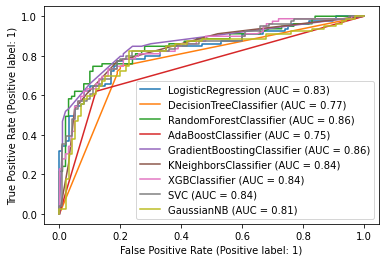

In [72]:
#Lets plot roc curve and check auc and performance of all algorithms
plt.figure(figsize=(40,40))
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax = disp.ax_)
plot_roc_curve(RF, X_test, y_test, ax = disp.ax_)
plot_roc_curve(ada, X_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, X_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, X_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm, X_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, X_test, y_test, ax = disp.ax_)
plt.show()

In [73]:
list1=['Logistic Regression','Decision Tree','Random Forest','K-nearestNeighbor','Adaboost','GradientBoosting','XGBoost'
       ,'svm','Naive-Bayes']

list2=[accuracy_lr,accuracy_dt,accuracy_RF, accuracy_kn,accuracy_ad, accuracy_gb , accuracy_xgb ,
    accuracy_svm,accuracy_nb]


list3=[10,19,10,7,12,11,13,11,14]
final_accuracy=pd.DataFrame({'Algorithm':list1,'Accuracy':list2,'FP values':list3})       

final_accuracy

,Algorithm,Accuracy,FP values
0,Logistic Regression,78.770950,10
1,Decision Tree,77.094972,19
2,Random Forest,80.446927,10
3,K-nearestNeighbor,77.653631,7
4,Adaboost,76.536313,12
5,GradientBoosting,75.977654,11
6,XGBoost,77.653631,13
7,svm,75.977654,11
8,Naive-Bayes,77.094972,14


### Conclusion : FP should be less So here we conclude that KNN is the best model  for prediction

### Applying  knn on test data 

In [75]:
test_data=pd.read_csv('test.csv')
test_data_1=test_data.copy()

In [76]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [92]:
test_data_1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [93]:
def preprocessor_test(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["Pclass"] = le.fit_transform(res_df["Pclass"])
    res_df["Sex"] = le.fit_transform(res_df["Sex"])
    res_df["Age"] = le.fit_transform(res_df["Age"])
    res_df["Embarked"] = le.fit_transform(res_df["Embarked"])
    
    
    return res_df

In [94]:
df_test=preprocessor_test(test_data_1)

In [95]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,"Kelly, Mr. James",1,44,0,0,330911,7.8292,NaN,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,60,1,0,363272,7.0000,NaN,2
2,894,1,"Myles, Mr. Thomas Francis",1,74,0,0,240276,9.6875,NaN,1
3,895,2,"Wirz, Mr. Albert",1,34,0,0,315154,8.6625,NaN,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,27,1,1,3101298,12.2875,NaN,2


In [96]:
df_test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [97]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,7.8292,1
1,2,0,60,1,0,7.0000,2
2,1,1,74,0,0,9.6875,1
3,2,1,34,0,0,8.6625,2
4,2,0,27,1,1,12.2875,2


In [98]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [99]:
## Filling the nan value in Fare by 
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True) 

In [119]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
arr1=standard_scaler.transform(df_test)

In [121]:
kn.predict(arr1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
test=kn.predict(arr1)

In [123]:
df_final_data=pd.DataFrame(test_data['PassengerId'])

In [124]:
df_final_data

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [128]:
df_final_data['Survived']=test

In [129]:
df_final_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [130]:
df_final_data.to_csv('Predicted_Submission.csv')
